**Análisis de Encuestas**

In [6]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('peopleware_agr.csv', sep='|',encoding='latin-1') 

In [8]:
data.head(6)

,Marca_temporal,Puntuación,Nacionalidad,Modalidad_de_trabajo,Departamento_de_residencia,Género,Edad_en_años,Rol_principal_actual_en_la_organización,Años_de_experiencia_en_desarrollo_de_software,Años_de_experiencia_en_la_organización_actual,...,18,19,20,21,Trabajo en equipo,Comunicación,Igualdad,Condición física,Liderazgo,Motivación
0,2022-10-04 22:08:01.0000000,NaN,Colombiana,Híbrida (Virtual+Presencial),Bogotá,Masculino,29,Diseñador o arquitecto,De 3 a 7 años,Menos de 1 año,...,4,1,2,2,3,2,3,3,3,3
1,2022-10-05 09:27:13.0000000,NaN,Colombiana,Virtual,Bogotá,Masculino,46,Analista,Superior a 7 años,Superior a 7 años,...,3,3,3,3,3,3,3,3,3,3
2,2022-10-05 09:29:45.0000000,NaN,Colombiana,Virtual,Nariño,Femenino,43,Documentador,De 1 a 3 años,Superior a 7 años,...,3,3,3,3,3,3,3,3,3,3
3,2022-10-05 09:40:25.0000000,NaN,Colombiana,Virtual,Nariño,Masculino,39,Administrador de proyecto,Superior a 7 años,De 1 a 3 años,...,4,4,4,4,4,3,4,4,3,4
4,2022-10-05 09:41:01.0000000,NaN,Colombiana,Virtual,Bogotá,Femenino,30,Programador,De 3 a 7 años,De 1 a 3 años,...,4,3,3,3,3,3,4,4,4,4
5,2022-10-05 09:45:10.0000000,NaN,Colombiana,Virtual,Bogotá,Masculino,31,Administrador de proyecto,Superior a 7 años,De 1 a 3 años,...,3,3,3,3,3,3,3,4,4,4


In [9]:
data.Considera_usted_que_los_proyectos_de_software_en_los_que_ha_participado_han_culminado_como

0      Discutidos
1        Exitosos
2        Exitosos
3        Exitosos
4      Discutidos
          ...    
119      Exitosos
120      Exitosos
121      Exitosos
122    Discutidos
123      Exitosos
Name: Considera_usted_que_los_proyectos_de_software_en_los_que_ha_participado_han_culminado_como, Length: 124, dtype: object

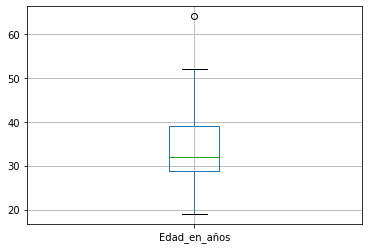

In [10]:
boxplot = data.boxplot(column=['Edad_en_años'])  

In [11]:
data.describe()

,Puntuación,Edad_en_años,1,2,3,4,5,6,7,8,...,18,19,20,21,Trabajo en equipo,Comunicación,Igualdad,Condición física,Liderazgo,Motivación
count,0.0,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,NaN,34.008065,3.225806,3.395161,3.427419,3.483871,3.483871,2.879032,3.153226,3.346774,...,3.379032,3.411290,3.274194,3.314516,3.491935,3.306452,3.387097,3.483871,3.290323,3.370968
std,NaN,7.339055,0.567962,0.595628,0.626948,0.604642,0.577123,0.906998,0.733012,0.612131,...,0.645091,0.611703,0.654425,0.629452,0.548404,0.558416,0.607670,0.562860,0.552514,0.604425
min,NaN,19.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,NaN,28.750000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,NaN,32.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,NaN,39.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,NaN,64.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [27]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [46]:
dim = [data['Comunicación'],
                      data['Trabajo en equipo'],
                      data['Igualdad'],
                      data['Condición física'],
                      data['Motivación'],
                      data['Liderazgo']]

In [47]:
cronbach_alpha(dim)

AttributeError: ignored

<Figure size 3600x3600 with 0 Axes>

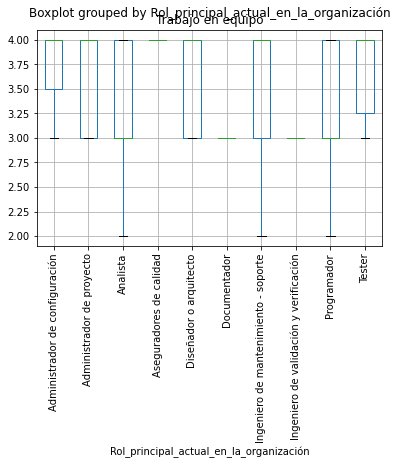

<Figure size 3600x3600 with 0 Axes>

In [14]:
#Python
data.boxplot(column='Trabajo en equipo',by='Rol_principal_actual_en_la_organización')
plt.xticks(rotation=90)
plt.figure(figsize=(50,50))

In [15]:
import plotly.express as px

In [16]:
fig = px.parallel_categories(data, dimensions=['Rol_principal_actual_en_la_organización', 'Modalidad_de_trabajo','Años_de_experiencia_en_desarrollo_de_software','Considera_usted_que_es_feliz_en_su_trabajo','Considera_usted_que_los_proyectos_de_software_en_los_que_ha_participado_han_culminado_como','Género'],
                color="Edad_en_años", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'Rol_principal_actual_en_la_organización':'Rol', 'Modalidad_de_trabajo':'Modalidad de trabajo','Años_de_experiencia_en_desarrollo_de_software':'Experiencia','Considera_usted_que_es_feliz_en_su_trabajo':'Felicidad','Considera_usted_que_los_proyectos_de_software_en_los_que_ha_participado_han_culminado_como':'Caos','Género':'Género'})

In [17]:
fig.show()